# Numpy

Biblioteca de processamento matemático de matrizes e arryas. É mais rápido que as listas comuns e têm várias facilidades como sobrecargas de operadores


In [84]:
from IPython.display import display
import numpy as np
import pandas as pd

a1 = np.array([1.0,2.0,3.0])
a2 = np.array([[4,5,6],[7,8,9]])
a3 = np.array([[[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]],
               [[10, 11, 12],
                [13, 14, 15],
                [16, 17, 18]]])

display(a1,a2, a3)
display(a1.shape, a2.shape, a3.shape) # dimensoes
display(a1.ndim, a2.ndim, a3.ndim) # número de dimensões
display(a1.dtype, a2.dtype, a3.dtype)  # tipo dos dados
display(a1.size, a2.size, a3.size)  # quantidade de elementos


array([1., 2., 3.])

array([[4, 5, 6],
       [7, 8, 9]])

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

(3,)

(2, 3)

(2, 3, 3)

1

2

3

dtype('float64')

dtype('int64')

dtype('int64')

3

6

18

In [85]:
df = pd.DataFrame(a2)
df

,0,1,2
0,4,5,6
1,7,8,9


## Criando arrays

Há várias funções de criação de matrizes (cheias de 0 ou de 1, identidade ...)

In [86]:
ones = np.ones(3) # unidimensional
display(ones)

ones = np.ones(shape=(3,3))  # np.ones((3,3))
display(ones)

range_arr = np.arange(-10,10,2)
display(range_arr)

rand_arr = np.random.randint(0,10, size=(3,5))
display(rand_arr)

array([1., 1., 1.])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

array([[9, 7, 3, 8, 2],
       [5, 1, 5, 8, 5],
       [1, 4, 2, 3, 3]])

In [87]:
np.random.seed(seed=0)
random_arr_seed = np.random.randint(10, size=(5,3))

display(random_arr_seed)

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

## Manipulando arrays

NumPy fornece sobrecarga dos operadores matemáticos básicos entre arrays (soma, sub, div, ...). Essas operações podem ser realizadas nos arrays desde que sejam da mesma dimensão ou desde que a dimensão de um dos arrays seja 1. 

> Procurar por "broadcasting" que o NumPy usa pra fazer esse tipo de operação 

In [88]:
display(a1 + a2, a1 * a2, a1 ** a2, a1 ** 2, a2 **2, a2 / a1)

array([[ 5.,  7.,  9.],
       [ 8., 10., 12.]])

array([[ 4., 10., 18.],
       [ 7., 16., 27.]])

array([[1.0000e+00, 3.2000e+01, 7.2900e+02],
       [1.0000e+00, 2.5600e+02, 1.9683e+04]])

array([1., 4., 9.])

array([[16, 25, 36],
       [49, 64, 81]])

array([[4. , 2.5, 2. ],
       [7. , 4. , 3. ]])

numpy também fornece implementação própria das operações aritméticas básicas. 

> Será se tem algum ganho de performance?

In [89]:
display(np.add(a1,a2))

array([[ 5.,  7.,  9.],
       [ 8., 10., 12.]])

### Agregação

Usar funções de agregação nos elementos é recomendável usar as funções próprias do numpy em ndarrays (`np.sum()`), e usar funções do próprio python em elementos nativos (`sum()`)

In [90]:
array_maluco = np.random.random(1000000)

%timeit sum(array_maluco)
%timeit np.sum(array_maluco)

72.1 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
449 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [91]:
high_var_arr = np.array([0, 10 , 20, 1000, 5000, ])
low_var_arr = np.arange(0, 10, 2)

display(np.var(high_var_arr), np.var(low_var_arr))
display(np.std(high_var_arr), np.std(low_var_arr))
display(np.mean(high_var_arr), np.mean(low_var_arr))

3745664.0

8.0

1935.371798905833

2.8284271247461903

1206.0

4.0

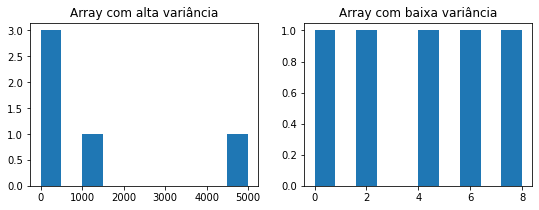

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
plt.hist(high_var_arr)
plt.title('Array com alta variância')

plt.subplot(1, 2, 2)
plt.hist(low_var_arr)
plt.title('Array com baixa variância')

plt.show()

### Rearranjando arrays

Quando as dimensões do array são incompatíveis por causa do broadcasting, os arrays podem ser rearranjados (ou transpostos) para obedecerem às regras

In [93]:
a2 * a3 # não dá certo pois não obedecem às regras

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

In [ ]:
display(a3.shape, a2.shape)

a2_reshape = a2.reshape(2, 3, 1)
a2_reshape * a3 # dá certo pois uma das dimensões dos arrays é 1

display(a2_reshape)

(2, 3, 3)

(2, 3)

array([[[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [ ]:
# Transpose é a mesma coisa de geometria analítica :P

a2.T, a2, a2.T.shape, a2.shape

(array([[4, 7],
        [5, 8],
        [6, 9]]),
 array([[4, 5, 6],
        [7, 8, 9]]),
 (3, 2),
 (2, 3))

### Produto interno e elemento à elemento

Rapaz, muito bom isso, queria poder usar isso nas aulas de álgebra há 2 anos atrás. Boas e velhas operações em matrizes

In [ ]:
mat1 = np.random.randint(10, size=(3,3))
mat2 = np.random.randint(10, size=(3,3))

display(mat1, mat2)

dot_prod = np.dot(mat1, mat2) # produto interno
elementwise_prod = mat1 * mat2

display("Interno:", dot_prod,"Elemento à elemento", elementwise_prod)

array([[1, 8, 0],
       [7, 9, 3],
       [5, 6, 1]])

array([[7, 0, 2],
       [9, 7, 9],
       [2, 0, 1]])

'Interno:'

array([[ 79,  56,  74],
       [136,  63,  98],
       [ 91,  42,  65]])

'Elemento à elemento'

array([[ 7,  0,  0],
       [63, 63, 27],
       [10,  0,  1]])

## Exercício: Tabela de vendas
 ~fazer depois